In [1]:
from Functions_25_Buda import *

# select the first 2 letters of my surname
# and first letter of my name
letters = ['B', 'U', 'C']

In [2]:
X_train, y_train, X_test, y_test = MulticlassSVM_data_loading(*letters)
cvres = GridSearchCV(X_train, y_train, get_model_multiclass, {'C' : [1e-2,1e-1,1,10], 'gamma' : [1e-2,1e-1,1,10]}, k = 10, kernel_type = 'gaussian', method = 'MVP-SMO', nclass = len(letters))

  0%|          | 0/16 [00:00<?, ?it/s]

The best multiclass gaussian kSVM has C = 0.1 and γ = 0.1 with performances:
Training accuracy (on the complete training dataset)= 0.9811015118790497
Test accuracy = 0.9762419006479481
Time necessary for the optimization = 1.8445158004760742 seconds
Number of optimization iterations in the underlying kSVMs = [836, 792, 1128]
Final difference between m(λ) and M(λ) = [9.941049525008516e-06, 9.254555597304481e-06, 9.632442866669422e-06]
Final value of the objective function of the dual in the underlying kSVMs = [27.03901361029885, 38.45434492790472, 35.98064189507886]


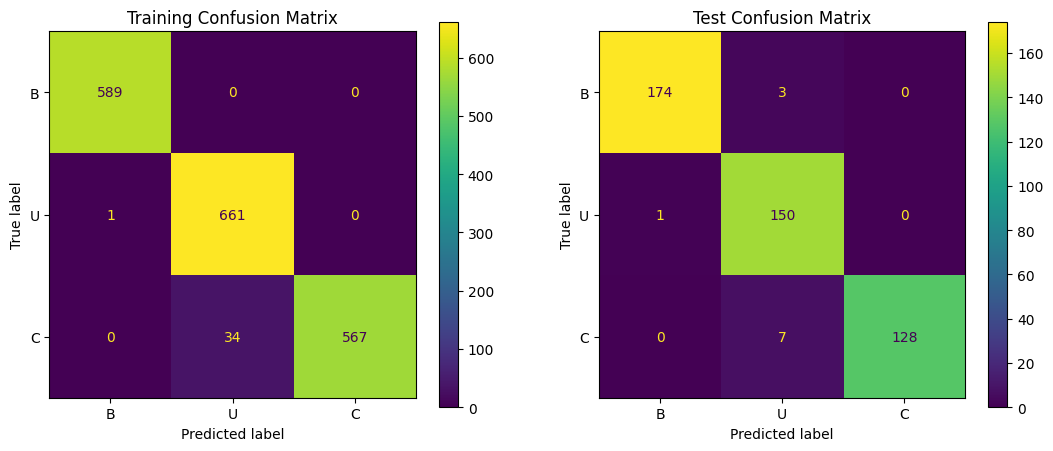

In [16]:
print(f"The best multiclass gaussian kSVM has C = {cvres['best_params']['C']} and γ = {cvres['best_params']['gamma']} with performances:")
# print(f"Average crossvalidation accuracy = {cvres['best_val_acc']}")
print(f"Training accuracy (on the complete training dataset)= {cvres['best_model'].evaluate(X_train, y_train)}")
print(f"Test accuracy = {cvres['best_model'].evaluate(X_test, y_test)}")
print(f"Time necessary for the optimization = {cvres['best_model'].exec_time} seconds")
print(f"Number of optimization iterations in the underlying kSVMs = {cvres['best_model'].n_iter}")
print(f"Final difference between m(λ) and M(λ) = {list(map(lambda x: x.final_violation, cvres['best_model'].model_list))}")
print(f"Final value of the objective function of the dual in the underlying kSVMs = {cvres['best_model'].final_dual_obj}")
plot_confusion_matrices(cvres['best_model'], X_train, y_train, X_test, y_test, letters)